1. Import Libraries

In [123]:
import pandas as pd

file_path = 'plot1 copy.xlsx'
data = pd.read_excel(file_path)

data.head()


,x1,y1,x2,y2,x3,y3,x4,y4
0,99.280576,84.906542,101.222494,14.750733,104.749679,1.156432,98.529412,14.718970
1,100.719424,84.850467,107.090465,15.102639,100.128370,1.157047,104.411765,15.070258
2,102.158273,84.794393,112.958435,15.454545,110.911425,1.155817,108.823529,15.362998
3,105.035971,84.738318,118.826406,15.747801,118.613607,1.155202,114.705882,15.655738
4,106.474820,84.682243,124.694377,16.041056,123.234917,1.154464,120.588235,15.948478


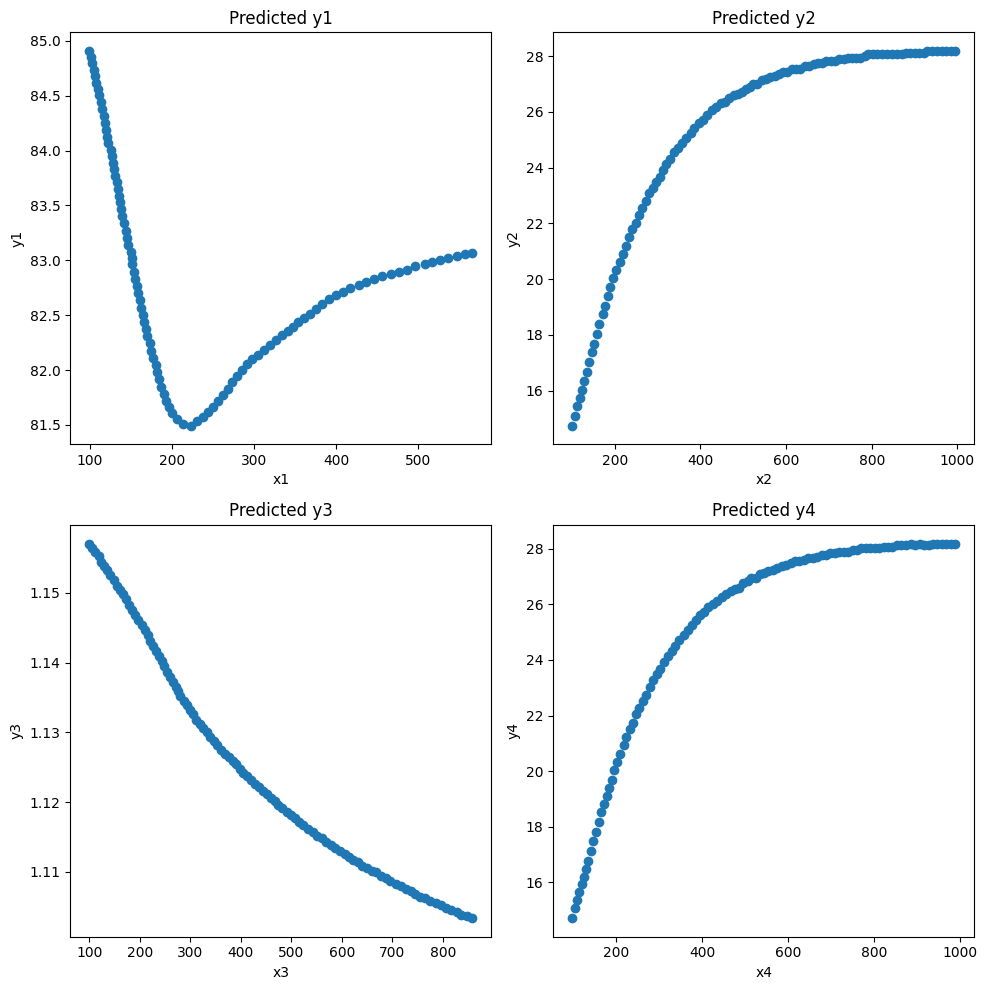

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(data['x1'], data['y1'], label='Predicted y1', marker='o')
axs[0, 0].set_title('Predicted y1')
axs[0, 0].set_xlabel('x1')
axs[0, 0].set_ylabel('y1')

# Second plot: X2 vs Y2
axs[0, 1].scatter(data['x2'], data['y2'], label='Predicted y2', marker='o')
axs[0, 1].set_title('Predicted y2')
axs[0, 1].set_xlabel('x2')
axs[0, 1].set_ylabel('y2')

# Third plot: X3 vs Y3
axs[1, 0].scatter(data['x3'], data['y3'], label='Predicted y3', marker='o')
axs[1, 0].set_title('Predicted y3')
axs[1, 0].set_xlabel('x3')
axs[1, 0].set_ylabel('y3')

# Fourth plot: X4 vs Y4
axs[1, 1].scatter(data['x4'], data['y4'], label='Predicted y4', marker='o')
axs[1, 1].set_title('Predicted y4')
axs[1, 1].set_xlabel('x4')
axs[1, 1].set_ylabel('y4')


plt.tight_layout()

# Display the plots
plt.show()



In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# model1 = LinearRegression()  
# model3 = LinearRegression()  

# model1.fit(data[['x1']], data['y1'])
# model3.fit(data[['x3']], data['y3'])

def apply_polynomial_regression(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    return model, poly

def find_best_polynomial_degree(x, y, max_degree=10):
    best_degree = 1
    best_mse = float('inf')
    best_model, best_poly = None, None
    
    for degree in range(1, max_degree + 1):
        model, poly = apply_polynomial_regression(x, y, degree)
        y_pred = model.predict(poly.transform(x))
        mse = mean_squared_error(y, y_pred)
        
        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_model, best_poly = model, poly
    
    return best_model, best_poly, best_degree, best_mse
model2, poly2, best_degree2, mse2 = find_best_polynomial_degree(data[['x2']], data['y2'])
model4, poly4, best_degree4, mse4 = find_best_polynomial_degree(data[['x4']], data['y4'])

# y1_pred = model1.predict(data[['x1']])
y2_pred = model2.predict(poly2.transform(data[['x2']]))
# y3_pred = model3.predict(data[['x3']])
y4_pred = model4.predict(poly4.transform(data[['x4']]))



In [126]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(data[['x1']], data['y1'])

predicted_y1 = rf.predict(data[['x1']])



In [127]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(data[['x3']], data['y3'])

predicted_y3 = rf.predict(data[['x3']])

Model 1 (Random forest for y1): R² = 0.9997678193101, MSE = 0.0001946478854049773
Model 2 (Polynomial for y2, Degree 5): R² = 0.9998965263566164, MSE = 0.001620410336308008
Model 3 (Rndom forest for y3): R² = 0.9999493768572233, MSE = 1.3077719984839227e-08
Model 4 (Polynomial for y4, Degree 5): R² = 0.9998784966105085, MSE = 0.0019731552212699064


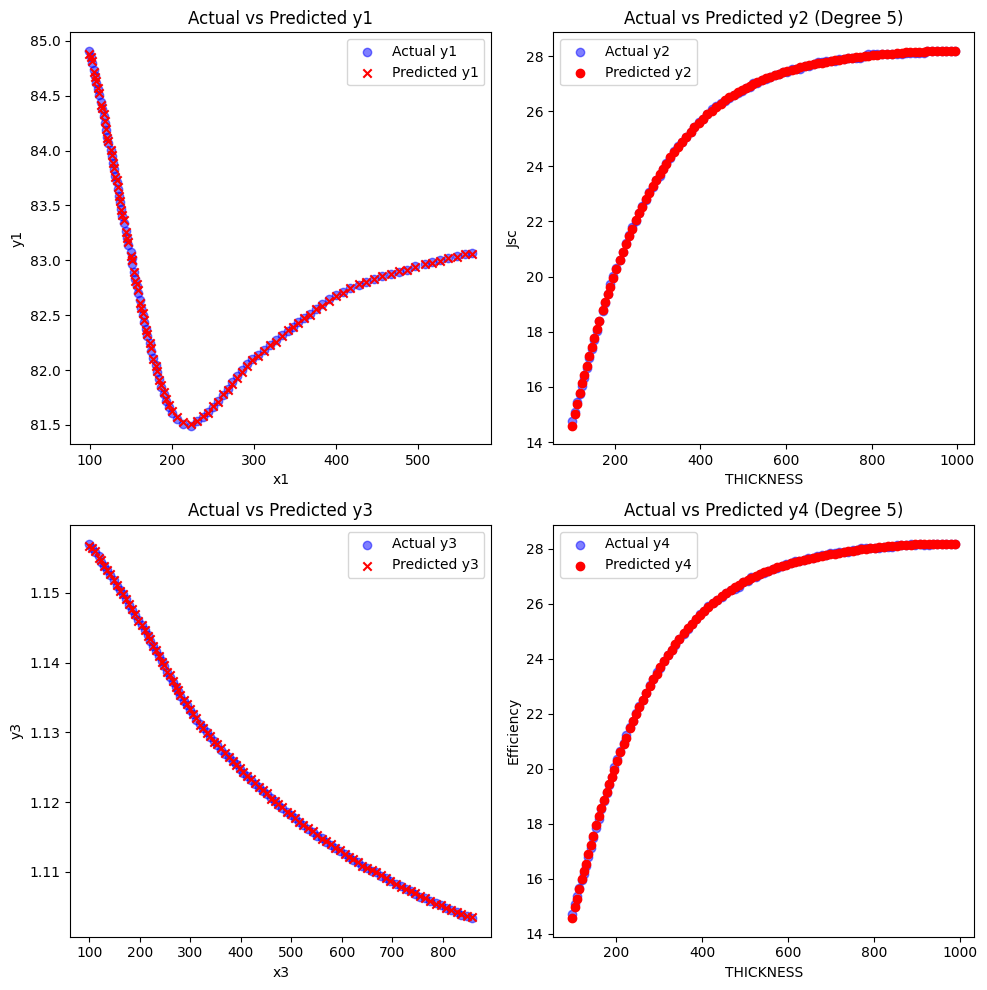

In [147]:
r2_1 = r2_score(data['y1'], predicted_y1)
r2_2 = r2_score(data['y2'], y2_pred)
r2_3 = r2_score(data['y3'], predicted_y3)
r2_4 = r2_score(data['y4'], y4_pred)

mse_1 = mean_squared_error(data['y1'], predicted_y1)
mse_2 = mean_squared_error(data['y2'], y2_pred)
mse_3 = mean_squared_error(data['y3'], predicted_y3)
mse_4 = mean_squared_error(data['y4'], y4_pred)

print(f"Model 1 (Random forest for y1): R² = {r2_1}, MSE = {mse_1}")
print(f"Model 2 (Polynomial for y2, Degree {best_degree2}): R² = {r2_2}, MSE = {mse_2}")
print(f"Model 3 (Rndom forest for y3): R² = {r2_3}, MSE = {mse_3}")
print(f"Model 4 (Polynomial for y4, Degree {best_degree4}): R² = {r2_4}, MSE = {mse_4}")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# axs[0, 0].scatter(data['x1'], data['y1'], label='Actual y1', color='blue', alpha=0.5)
# axs[0, 0].scatter(data['x1'], y1_pred, label='Predicted y1', color='red', marker='o')
# axs[0, 0].set_title('Actual vs Predicted y1')
# axs[0, 0].set_xlabel('THICKNESS')
# axs[0, 0].set_ylabel('FF')
# axs[0, 0].legend()

axs[0, 0].scatter(data['x1'], data['y1'], label='Actual y1', color='blue', alpha=0.5)
axs[0, 0].scatter(data['x1'], predicted_y, label='Predicted y1', color='red', marker='x')
axs[0, 0].set_title('Actual vs Predicted y1')
axs[0, 0].set_xlabel('x1')
axs[0, 0].set_ylabel('y1')
axs[0, 0].legend()

axs[0, 1].scatter(data['x2'], data['y2'], label='Actual y2', color='blue', alpha=0.5)
axs[0, 1].scatter(data['x2'], y2_pred, label='Predicted y2', color='red', marker='o')
axs[0, 1].set_title(f'Actual vs Predicted y2 (Degree {best_degree2})')
axs[0, 1].set_xlabel('THICKNESS')
axs[0, 1].set_ylabel('Jsc')
axs[0, 1].legend()

# axs[1, 0].scatter(data['x3'], data['y3'], label='Actual y3', color='blue', alpha=0.5)
# axs[1, 0].scatter(data['x3'], y3_pred, label='Predicted y3', color='red', marker='o')
# axs[1, 0].set_title('Actual vs Predicted y3')
# axs[1, 0].set_xlabel('THICKNESS')
# axs[1, 0].set_ylabel('Voc')
# axs[1, 0].legend()

# fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs[1, 0].scatter(data['x3'], data['y3'], label='Actual y3', color='blue',marker='o', alpha=0.5)
axs[1, 0].scatter(data['x3'], predictions_y3, label='Predicted y3', color='red', marker = 'x')
axs[1, 0].set_title('Actual vs Predicted y3')
axs[1, 0].set_xlabel('x3')
axs[1, 0].set_ylabel('y3')
axs[1, 0].legend()

axs[1, 1].scatter(data['x4'], data['y4'], label='Actual y4', color='blue', alpha=0.5)
axs[1, 1].scatter(data['x4'], y4_pred, label='Predicted y4', color='red', marker='o')
axs[1, 1].set_title(f'Actual vs Predicted y4 (Degree {best_degree4})')
axs[1, 1].set_xlabel('THICKNESS')
axs[1, 1].set_ylabel('Efficiency')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [129]:
# def predict_all(x_val):
#     # Prepare the input as a 2D array for prediction
#     x1_val = np.array([[x_val]])
#     x2_val = np.array([[x_val]])
#     x3_val = np.array([[x_val]])
#     x4_val = np.array([[x_val]])
    
#     # Predict for each model
#     # y1_pred = model1.predict(x1_val)[0]
#     y2_pred = model2.predict(poly2.transform(x2_val))[0]
#     # y3_pred = model3.predict(x3_val)[0]
#     y4_pred = model4.predict(poly4.transform(x4_val))[0]
    
#     return y1_pred, y2_pred, y3_pred, y4_pred
# # Example usage:
# x_val = 111.157025 
# y1_pred, y2_pred, y3_pred, y4_pred = predict_all(x_val)

# # Output the results
# print(f"For x = {x_val}:")
# print(f"Predicted y1 = {y1_pred}")
# print(f"Predicted y2 = {y2_pred}")
# print(f"Predicted y3 = {y3_pred}")
# print(f"Predicted y4 = {y4_pred}")


In [130]:
train_features = ['x1']  # Define features explicitly
rf.fit(data[train_features], data['y1'])

predicted_y1 = rf.predict(data[train_features])  # Use the same columns


In [131]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(data[['x1']], data['y1'])


RandomForestRegressor(random_state=42)

In [132]:
predicted_y1 = rf.predict(data[['x1']])
predicted_y1

array([84.87794393, 84.85102804, 84.81233645, 84.71635514, 84.67121495,
       84.63794393, 84.57308411, 84.52691589, 84.41672897, 84.38495327,
       84.33242991, 84.27065421, 84.19757009, 84.11728972, 84.08878505,
       84.0011215 , 83.96158879, 83.88700935, 83.84065421, 83.75663551,
       83.72757009, 83.66598131, 83.59037383, 83.53672897, 83.45607477,
       83.41682243, 83.36327103, 83.25401869, 83.2017757 , 83.17028037,
       83.03872897, 83.00319626, 83.00319626, 82.8917757 , 82.81607477,
       82.78074766, 82.73102804, 82.61392523, 82.5635514 , 82.5171028 ,
       82.45626168, 82.3646729 , 82.32476636, 82.24299065, 82.19719626,
       82.09841121, 82.03364486, 81.99373832, 81.90803738, 81.86158879,
       81.79943925, 81.73626168, 81.67841121, 81.62448598, 81.56897196,
       81.52429907, 81.50906542, 81.53429907, 81.58      , 81.60728972,
       81.67588785, 81.71121495, 81.7835514 , 81.81663551, 81.87607477,
       81.92990654, 81.98364486, 82.0388785 , 82.09327103, 82.13

In [133]:
data_reshaped = data[['x2']].values.reshape(-1, 1)
y2_pred = model2.predict(poly2.transform(data_reshaped))
y2_pred

/Users/shashankgautam/Downloads/untitled folder 2 copy/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([14.59858865, 14.99929183, 15.38981709, 15.77036737, 16.14114288,
       16.41292875, 16.7670721 , 17.11197742, 17.44783491, 17.77483211,
       18.09315396, 18.4029828 , 18.77859917, 19.06997209, 19.35342686,
       19.62913499, 19.96313363, 20.28561658, 20.59690239, 20.89730367,
       21.1871271 , 21.46667348, 21.73623783, 22.04694564, 22.29555967,
       22.53509728, 22.81094302, 23.03145936, 23.28524048, 23.4879897 ,
       23.72117661, 23.90735556, 24.08638302, 24.32544489, 24.52002494,
       24.70546725, 24.88213785, 25.07764127, 25.26223711, 25.41218237,
       25.57791212, 25.73419915, 25.88152196, 26.02034184, 26.15110309,
       26.27423333, 26.39014382, 26.49922968, 26.60187026, 26.68499416,
       26.77661856, 26.85080683, 26.92119697, 26.98798401, 27.0513553 ,
       27.1212108 , 27.18693435, 27.24878533, 27.30701001, 27.36184179,
       27.40630773, 27.45541502, 27.50172806, 27.5454334 , 27.58670611,
       27.62571015, 27.66259856, 27.69751381, 27.73058808, 27.76

In [134]:
train_features = ['x3']  # Define features explicitly
rf.fit(data[train_features], data['y3'])

predicted_y3 = rf.predict(data[train_features])  # Use the same columns


In [135]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(data[['x3']], data['y3'])


RandomForestRegressor(random_state=42)

In [136]:
predicted_y3 = rf.predict(data[['x3']])
predicted_y3

array([1.15640527, 1.15670053, 1.15593163, 1.15502496, 1.1546239 ,
       1.15384271, 1.15323374, 1.15267891, 1.15189402, 1.15118172,
       1.15029227, 1.14980756, 1.14909033, 1.14838541, 1.14769279,
       1.14701371, 1.14595817, 1.14540457, 1.14464429, 1.14374376,
       1.14336731, 1.14232654, 1.14178032, 1.14100527, 1.14006784,
       1.13958805, 1.13868752, 1.13815606, 1.1373761 , 1.13643374,
       1.13606344, 1.1353536 , 1.13464376, 1.13402127, 1.13336432,
       1.13269508, 1.13199016, 1.13100967, 1.13069596, 1.12985325,
       1.12947188, 1.12866608, 1.12829086, 1.12773111, 1.12710615,
       1.12648243, 1.12588453, 1.1252768 , 1.12490035, 1.12431476,
       1.12382144, 1.12332566, 1.12270439, 1.12220984, 1.12176573,
       1.12125764, 1.12052443, 1.12012583, 1.1197174 , 1.11925975,
       1.11856098, 1.11824605, 1.11779824, 1.11713392, 1.1167993 ,
       1.11632689, 1.11585571, 1.11529596, 1.11471652, 1.1144754 ,
       1.11395747, 1.11340633, 1.11310369, 1.11255747, 1.11208

In [137]:
data_reshaped = data[['x4']].values.reshape(-1, 1)
y4_pred = model4.predict(poly4.transform(data_reshaped))
y4_pred

/Users/shashankgautam/Downloads/untitled folder 2 copy/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([14.56618733, 14.9618685 , 15.25228581, 15.63119174, 16.00075177,
       16.27189215, 16.53794424, 16.88488841, 17.22308082, 17.552687  ,
       17.95286944, 18.26375205, 18.56657345, 18.86149123, 19.14866115,
       19.42823713, 19.70037126, 19.96521381, 20.28623919, 20.59638925,
       20.89594558, 21.12814956, 21.46438141, 21.73380226, 21.99371209,
       22.24437079, 22.486034  , 22.76450942, 22.9872614 , 23.24375292,
       23.44876547, 23.6846525 , 23.90986314, 24.12478349, 24.32979117,
       24.52525536, 24.7115369 , 24.91772932, 25.11244813, 25.27062033,
       25.44542658, 25.58728405, 25.72210373, 25.87089777, 26.01098248,
       26.14280554, 26.26680018, 26.38338527, 26.49296545, 26.59593123,
       26.69265909, 26.77087904, 26.85697371, 26.92658737, 27.00321149,
       27.07518721, 27.13340761, 27.19753263, 27.25782721, 27.31455232,
       27.367956  , 27.41827347, 27.46572725, 27.51052723, 27.55287083,
       27.59294309, 27.63091681, 27.6669526 , 27.70119906, 27.73

In [138]:

df = pd.DataFrame()

In [139]:
df["x1 values"] = data[['x1']]
df["y1 values"] = predicted_y1
df["x2 values"] = data[['x2']]
df["y2 values"] = y2_pred
df["x3 values"] = data[['x3']]
df["y3 values"] = predicted_y3
df["x4 values"] = data[['x4']]
df["y4 values"] = y4_pred

In [140]:
df

,x1 values,y1 values,x2 values,y2 values,x3 values,y3 values,x4 values,y4 values
0,99.280576,84.877944,101.222494,14.598589,104.749679,1.156405,98.529412,14.566187
1,100.719424,84.851028,107.090465,14.999292,100.128370,1.156701,104.411765,14.961868
2,102.158273,84.812336,112.958435,15.389817,110.911425,1.155932,108.823529,15.252286
3,105.035971,84.716355,118.826406,15.770367,118.613607,1.155025,114.705882,15.631192
4,106.474820,84.671215,124.694377,16.141143,123.234917,1.154624,120.588235,16.000752
...,...,...,...,...,...,...,...,...
95,526.618705,82.996636,953.545232,28.177786,816.431322,1.104578,947.058824,28.181695
96,536.690647,83.021121,963.814181,28.180058,827.214377,1.104220,957.352941,28.180532
97,546.762590,83.034673,974.083130,28.181130,836.456996,1.104004,967.647059,28.177137
98,556.834532,83.054019,984.352078,28.180961,847.240051,1.103743,977.941176,28.171347


In [141]:
df.to_csv('prediction_values_thickness.csv', index = False)